In [1]:
# first import libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont, ImageEnhance
import os

In [2]:
# tensorflow
import tensorflow as tf
from tensorflow.python.keras.utils.vis_utils import plot_model

In [3]:
#import time
import time
# get the images directory
image_dir = os.getcwd()

In [4]:
# get the background and waldo image directory
background_dir = image_dir + '/background.png'
waldo_dir = image_dir + '/waldo.png'
wilma_dir = image_dir + '/wilma.png'

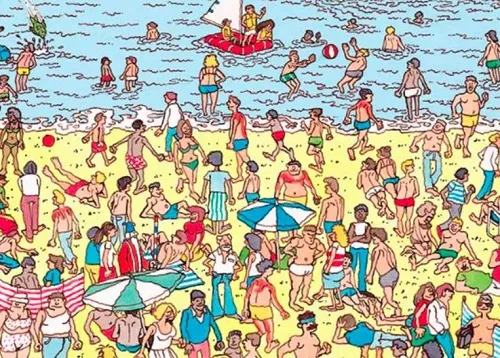

In [5]:
# background image
background_im = Image.open(background_dir)
background_im

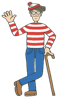

In [6]:
# image of waldo
waldo_im = Image.open(waldo_dir)
waldo_im = waldo_im.resize((60, 100))
waldo_im

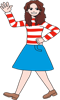

In [7]:
# wilma
wilma_im = Image.open(wilma_dir)
wilma_im = wilma_im.resize((60, 100))
wilma_im

In [8]:
# create a function to generate images
def generate_sample_image():

    # background image
    background_im = Image.open(background_dir)
    background_im = background_im.resize((500, 350))
    #background_im = Image.new("RGB", (500, 350), (255, 255, 255))

    # waldo
    waldo_im = Image.open(waldo_dir)
    waldo_im = waldo_im.resize((60, 100))

    # wilma
    wilma_im = Image.open(wilma_dir)
    wilma_im = wilma_im.resize((60, 100))

    # select x and y coordinates randomly we'll select between (0, 430) and (0, 250)
    col = np.random.randint(0, 410)
    row = np.random.randint(0, 230)

    # pic randomly between waldo and wilma. If 1 we will select waldo. if 0 we wills elect wilma
    rand_person = np.random.choice([0, 1], p=[0.5, 0.5])

    if rand_person == 1:

        background_im.paste(waldo_im, (col, row), mask=waldo_im)
        cat = 'Waldo'

    else:

        background_im.paste(wilma_im, (col, row), mask=wilma_im)
        cat = 'Wilma'

    return np.array(background_im).astype('uint8'), (col, row), rand_person, cat

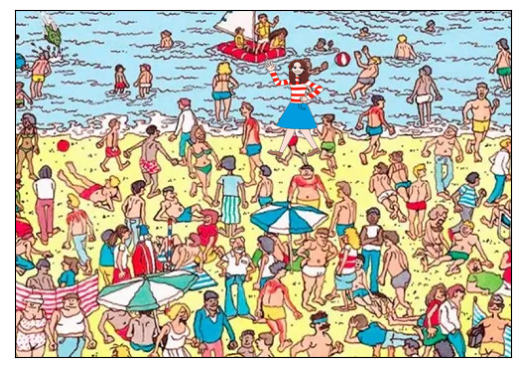

In [9]:
# generate the sample image and plot
sample_im, pos, _, cat = generate_sample_image()
plt.imshow(sample_im)
plt.xticks([])
plt.yticks([])
plt.show()

In [10]:
#create the bounding boxes
def plot_bounding_box(image, gt_coords, pred_coords = None):

  #convert the image to an array:
  image = Image.fromarray(image)
  draw = ImageDraw.Draw(image)
  draw.rectangle((gt_coords[0], gt_coords[1], gt_coords[0]+60, gt_coords[1]+100), outline = 'green', width = 5)

  if pred_coords:
    draw.rectangle((pred_coords[0], pred_coords[1], pred_coords[0]+60, pred_coords[1]+100), outline = 'red', width = 5)
  
  return image

In [11]:
#generate example image
sample_im, pos, _, cat = generate_sample_image()

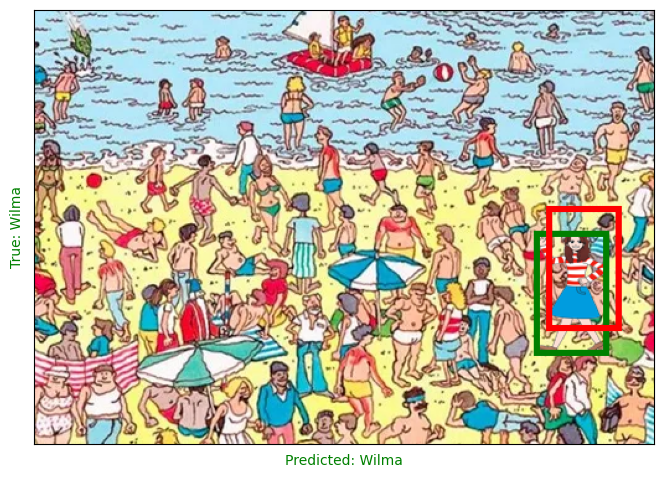

In [12]:
#generate image with bounding box
im= plot_bounding_box(sample_im, pos, (pos[0]+10, pos[1]-20))

plt.figure(figsize = (8, 8))
plt.imshow(im)
plt.xticks([])
plt.yticks([])
plt.xlabel('Predicted: ' + cat, color='green')
plt.ylabel('True: ' + cat, color='green')
plt.show()

In [13]:
#data generator function
def generate_data(batch_size=16):

  while True:
     
     #create empty arrays for the generated data
     x_batch = np.zeros((batch_size, 350, 500, 3))
     y_batch = np.zeros((batch_size, 1))
     boundary_box = np.zeros((batch_size, 2))

     for i in range(batch_size):

       #generating an example impage
       sample_im, pos, person, _ = generate_sample_image()

       #put the images to the arrays
       x_batch[i] = sampel_im/255 #normalize
       y_batch[i] = person
       boundary_box[i, 0] = pos[0]
       boudnary_box[i, 1] = pos[1]

       yield {'image': x_batch} , {'class': y_batch, 'box': boundary_box}